In [31]:
## Digits

In [32]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork
from gympy.optimizers import GradientDescent
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [33]:
digits = load_digits()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [35]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [36]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [37]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = GradientDescent(learning_rate=1e-2),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [38]:
tt = model.forward(X[:,0:1])
tt

array([[0.10185463],
       [0.09905594],
       [0.09980823],
       [0.1009898 ],
       [0.09844405],
       [0.10003284],
       [0.10215524],
       [0.09947218],
       [0.09931812],
       [0.09886895]])

In [39]:
yy = Y[:,0:1]
yy

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
np.log(0.5)

-0.6931471805599453

In [41]:
CategoricalCrossEntropy()(tt, Y[:,0:1])

2.3120705016802874

0 cost 2.3025397216655783
30 cost 2.152861952682799
60 cost 1.54344367747858
90 cost 1.0709641766364826
120 cost 0.7818743425827824
150 cost 0.594660049974726
180 cost 0.46896975433467447
210 cost 0.3831431729335346
240 cost 0.3239931020307416
270 cost 0.2829189765914563
300 cost 0.2545276571003566
330 cost 0.23909225801713846
360 cost 0.24004348868834405


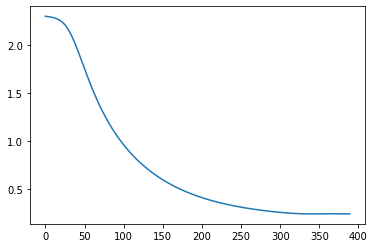

In [42]:

model.train(X,Y, show=30)
plt.plot(np.arange(n_iter), model.cost)

In [43]:
model.forward(X[:,[451]]).argmax(axis=0)

array([2])

In [44]:
Y[:,451].argmax(axis=0)

2